In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model,model_selection,metrics


In [3]:
data = pd.read_csv('/content/Ecommerce Customers.csv')
print(data.shape)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Ecommerce Customers.csv'

In [31]:
data.describe()
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [44]:
newData = data.drop(['Email', 'Address', 'Avatar'],axis=1,inplace=False)
newData.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


<Axes: >

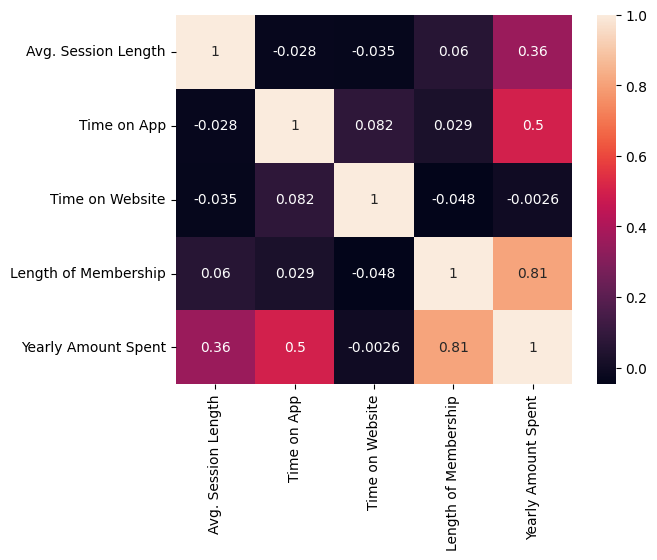

In [33]:
corr = newData.corr()
sns.heatmap(corr,annot=True)

<Figure size 640x480 with 0 Axes>

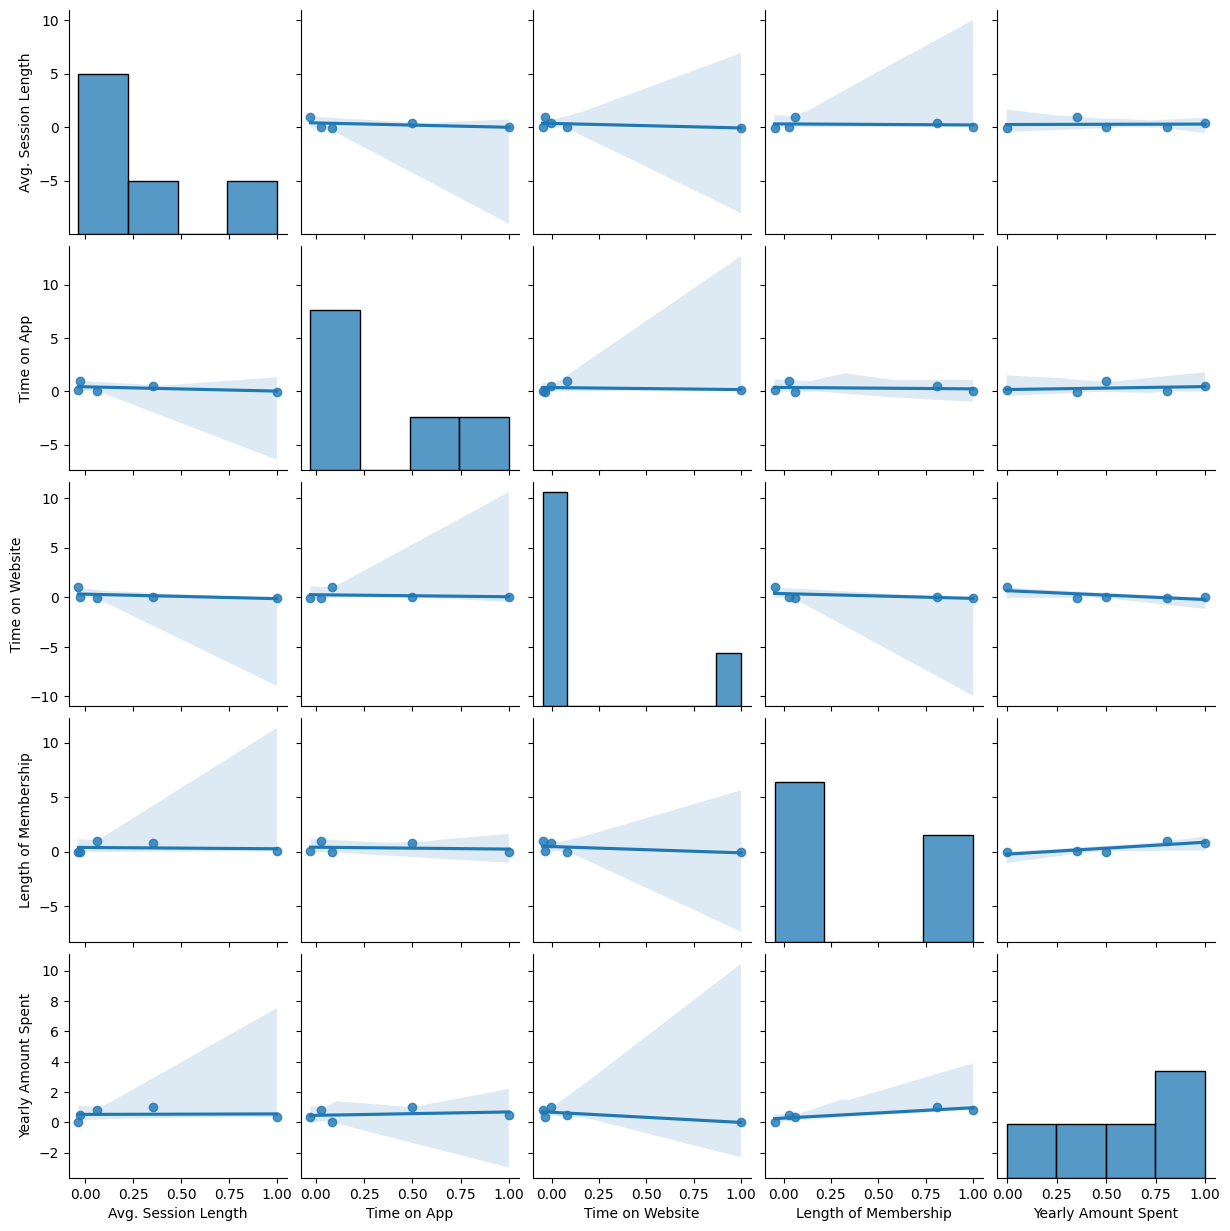

In [34]:
plt.figure(1)
sns.pairplot(corr,kind ='reg')

In [39]:
#['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']
x = data['Length of Membership'].values
y = data['Yearly Amount Spent'].values

# if single independent variable is considered
x = x.reshape(-1,1)

# split the data into train and test
ratio= 0.3
[xtrain,xtest,ytrain,ytest] = model_selection.train_test_split(x,y,test_size=ratio,random_state=5)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(350, 1) (350,)
(150, 1) (150,)


In [40]:
# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(xtrain)
# predict the xtest data
ypredTst = lnModel.predict(xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.6324367890615843
Testing r2 value: 0.7088169889244431


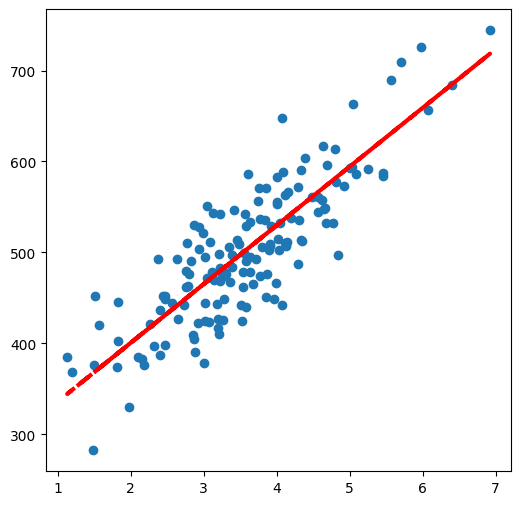

In [42]:
plt.figure(1,(6,6))
plt.scatter(xtest,ytest)
plt.plot(xtest,ypredTst, '--r' , linewidth=3)